## Observations and Insights

1. 
2. 
3. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata,study_results, on="Mouse ID",how= "outer")

# Display the data table for preview
mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
print(mouse_results["Mouse ID"].count())
print(mouse_results["Mouse ID"].nunique())

1893
249


In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_time = mouse_results.duplicated(subset=["Mouse ID","Timepoint"],keep="first")

#Adding a column for Duplicate Mouse Results True of False
mouse_results["Duplicate Mouse Results"] = duplicate_mice_time

# Optional: Get all the data for the duplicate mouse ID. 
duplicate_results = mouse_results.loc[mouse_results["Duplicate Mouse Results"] == True, :]

#DataFrame of the Duplicated mouse
bad_mouse = mouse_results.loc[mouse_results["Mouse ID"] == 'g989']

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_results = mouse_results.drop(mouse_results.index[mouse_results['Mouse ID'] == 'g989'])
del clean_mouse_results["Duplicate Mouse Results"]
clean_mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
print(clean_mouse_results["Mouse ID"].count())
print(clean_mouse_results["Mouse ID"].nunique())

1880
248


## Summary Statistics

In [9]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = clean_mouse_results.groupby(['Drug Regimen'])

In [10]:
# Mean of Tumor Volume
avg_tumor_reg = regimen_group["Tumor Volume (mm3)"].mean()

In [11]:
# Median of Tumor Volume
med_tumor_reg = regimen_group["Tumor Volume (mm3)"].median()

In [12]:
# Variance of Tumor Volume
var_tumor_reg = regimen_group["Tumor Volume (mm3)"].var()

In [13]:
# Standard Deviation of Tumor Volume
stdev_tumor_reg = regimen_group["Tumor Volume (mm3)"].std()

In [14]:
# SEM of Tumor Volume
sem_tumor_reg = regimen_group["Tumor Volume (mm3)"].sem()
# sem_tumor_reg = sem_tumor_reg[]

In [15]:
# Assemble the resulting series into a single summary dataframe.
regimen_statistics = pd.DataFrame({"Tumor Volume Mean" : avg_tumor_reg,
                                   "Tumor Volume Median" : med_tumor_reg,
                                   "Tumor Volume Variance" : var_tumor_reg,
                                   "Tumor Volume St. Deviation" : stdev_tumor_reg,
                                   "Tumor Volume SEM" : sem_tumor_reg})
regimen_statistics

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume St. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [16]:
regimens = clean_mouse_results['Drug Regimen'].unique()
regimens

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [17]:
total_volume = regimen_group['Drug Regimen'].count()
total_volume

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

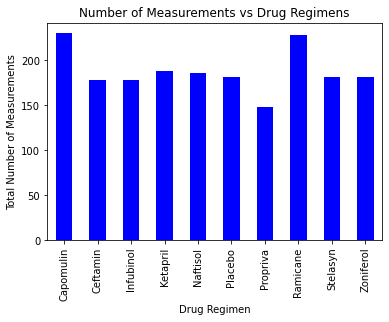

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_drug_pan = total_volume.plot(x = regimens, y = total_volume, 
                                 kind="bar", color='blue',
                                 title = "Number of Measurements vs Drug Regimens")
plt.ylabel("Total Number of Measurements")
plt.show()

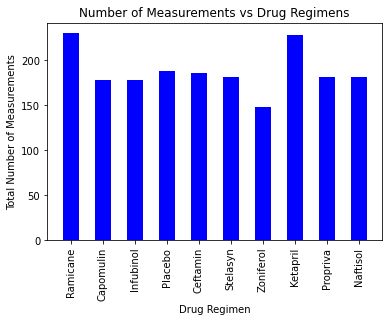

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

bar_drug_py = plt.bar(regimens, total_volume, color ="blue", 
                       width = .5)

plt.title("Number of Measurements vs Drug Regimens")
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")
plt.show()

In [20]:
gender_sort = clean_mouse_results.sort_values(by=['Sex'])
gender = gender_sort['Sex'].unique()

In [21]:
gender_group = clean_mouse_results.groupby(['Sex'])
gender_count = gender_group['Sex'].count()

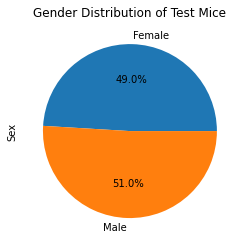

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_gender_pan = gender_count.plot(y = gender_count, kind = "pie", 
                                   title = "Gender Distribution of Test Mice", autopct = '%1.1f%%')
pie_gender_pan

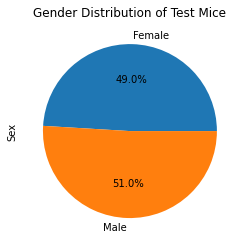

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_gender_py = plt.pie(gender_count, labels = gender, autopct = '%1.1f%%')

plt.title("Gender Distribution of Test Mice")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [62]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [63]:
# Start by getting the last (greatest) timepoint for each mouse
mouse_max_time = pd.DataFrame(clean_mouse_results.groupby(["Mouse ID"])["Timepoint"].max())
mouse_max_time

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [64]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_max_tumor = pd.merge(clean_mouse_results,final_time_volume.reset_index(),
                             on = ["Mouse ID", "Timepoint"], how = "inner")
mouse_max_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [66]:
# Put treatments into a list for for loop (and later for plot labels)
top_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
top_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

In [67]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#For loop the get the final tumor volumes of the Top Regimens

for drug in top_regimens:
    drug_results = mouse_max_tumor.loc[mouse_max_tumor["Drug Regimen"] == drug]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    final_tumor_volume = drug_results["Tumor Volume (mm3)"]
    
    # Add subset
    
    tumor_volume.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds using quartiles
  
    quartiles = final_tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"The interquartile range of Tumor Volume for {drug} is: {round(iqr,2)}")
    print(f"The values below {round(lower_bound,2)} could be outlier for {drug}")
    print(f"The values above {round(upper_bound,2)} could be outlier for {drug}\n")

The interquartile range of Tumor Volume for Capomulin is: 7.78
The values below 20.7 could be outlier for Capomulin
The values above 51.83 could be outlier for Capomulin

The interquartile range of Tumor Volume for Ramicane is: 9.1
The values below 17.91 could be outlier for Ramicane
The values above 54.31 could be outlier for Ramicane

The interquartile range of Tumor Volume for Infubinol is: 11.48
The values below 36.83 could be outlier for Infubinol
The values above 82.74 could be outlier for Infubinol

The interquartile range of Tumor Volume for Ceftamin is: 15.58
The values below 25.36 could be outlier for Ceftamin
The values above 87.67 could be outlier for Ceftamin



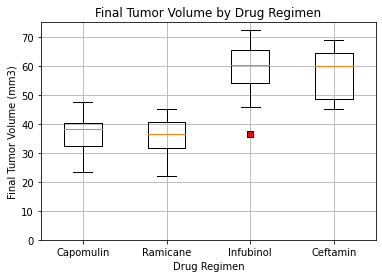

In [98]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier = dict(markerfacecolor = 'r', marker = 's')
fig1,ax1 = plt.subplots()
ax1.boxplot(tumor_volume, labels = top_regimens, showfliers = True, flierprops = outlier)
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_ylim(0,75)
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.grid(True)
plt.show()

## Line and Scatter Plots

In [90]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
one_mouse_result = clean_mouse_results.loc[clean_mouse_results["Mouse ID"] == "s185"]
one_mouse_result

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


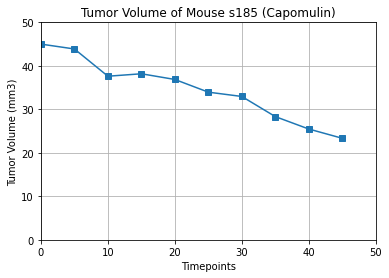

In [102]:
plt.plot(one_mouse_result["Timepoint"], one_mouse_result["Tumor Volume (mm3)"], marker = "s")

plt.title("Tumor Volume of Mouse s185 (Capomulin)")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,50)
plt.ylim(0,50)
plt.grid(True)
plt.show()

In [103]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == "Capomulin"]
capomulin

avg_capomulin_group = capomulin.groupby(["Mouse ID"]).mean()
avg_capomulin_group

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


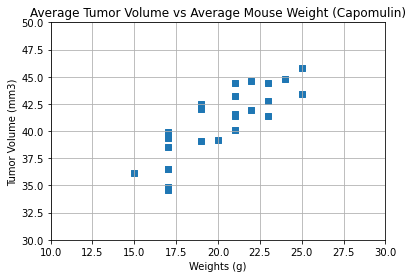

In [119]:
plt.scatter(avg_capomulin_group["Weight (g)"], avg_capomulin_group["Tumor Volume (mm3)"],marker = "s")

plt.title("Average Tumor Volume vs Average Mouse Weight (Capomulin)")
plt.xlabel("Weights (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(10,30)
plt.ylim(30,50)
plt.grid(True)
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen